In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression
from keras.models import load_model
from keras.layers.rnn.gru_v1 import GRU
import string
import time
import random

In [31]:
def euclidianDistance(true, pred):

  # this function, calculates euclidian distances between actual points and
  # predicted points.
  # Inputs:
    # true: np.array, actual data
    # pred: np.array, predicted data
  # Return: np.array, euclidian distance between points

  distances = []
  for sub in np.subtract(true, pred) ** 2:
    distances.append(np.sqrt(sub[0] + sub[1]))

  return np.array(distances) 


def manhattanDistance(true, pred):

  # this function, calculates manhattan distances between actual points and
  # predicted points.
  # Inputs:
    # true: np.array, actual data
    # pred: np.array, predicted data
  # Return: np.array, manhattan distance between points

  distances = []
  for sub in np.subtract(true, pred):
    distances.append(abs(sub[0]) + abs(sub[1]))

  return np.array(distances) 


def rmse(true, pred):

  # this function, calculates RMSE using euclidian distance.
  # Inputs:
    # true: np.array, actual data
    # pred: np.array, predicted data
  # Return: float, RMSE

  error = euclidianDistance(true, pred)
  return sum(error) / len(error)


def mae(true, pred):
  # this function, calculates MAE using euclidian distance.
  # Inputs:
    # true: np.array, actual data
    # pred: np.array, predicted data
  # Return: float, MAE

  error = manhattanDistance(true, pred)
  return sum(error) / len(error)


def mape(true, pred):

  # this function, calculates MAPE metric.
  # Inputs:
    # true: np.array, actual data
    # pred: np.array, predicted data
  # Return: MAPE in horizontal axis and MAPE in vertical axis

  x_pred = []
  y_pred = []
  x_true = []
  y_true = []

  for i in range(len(pred)):

      x_pred.append(pred[i][0])
      y_pred.append(pred[i][1])
      x_true.append(true[i][0])
      y_true.append(true[i][1])

  x_pred = np.array(x_pred)
  y_pred = np.array(y_pred)
  x_true = np.array(x_true)
  y_true = np.array(y_true)

  y_true[y_true==0.0] = 0.00001
  x_true[x_true==0.0] = 0.00001

  mape_x = sum(abs(np.divide(np.subtract(x_true, x_pred), x_true))) / len(x_true)
  mape_y = sum(abs(np.divide(np.subtract(y_true, y_pred), y_true))) / len(y_true)

  return mape_x, mape_y


def performanceMeasures(y_true, y_pred, title):

    true_y = y_true.flatten().reshape(len(y_true.flatten()), 1)
    pred_y = y_pred.flatten().reshape(len(y_pred.flatten()), 1)

    print("\n" + title)
    print("==================================")
    print("Pearson's Correlation Coefficient: ", r_regression(true_y, pred_y)[0])
    print("R-squared: ", r2_score(true_y, pred_y))
    print("RMSE: ", rmse(y_true, y_pred))
    print("MAE: ", mae(y_true, y_pred))
    print("Horizontal MAPE: ", mape(y_true, y_pred)[0])
    print("Vertical MAPE: ", mape(y_true, y_pred)[1])

def rnn(x, y, val_x, val_y):

    # This function for building, fitting and visualizing RNN model.
    # Inputs:
    # x: np.array, train x
    # y: np.array, train y
    # val_x: np.array, validation x
    # val_y: np.array, validation y
    # Return:
    # model: trained and validated rnn model

    model = Sequential()
    model.add(SimpleRNN(units = 64, activation="tanh", 
                            return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.3))
    model.add(SimpleRNN(units = 64, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units = 32, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.1))
    model.add(SimpleRNN(units = 32))
    model.add(Dropout(0.1))             
    model.add(Dense(units=2))            

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()

    history = model.fit(x, y, epochs=300, batch_size=32, validation_data=(val_x, val_y))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    return model


def lstm(x, y, val_x, val_y):

    # This function for building, fitting and visualizing LSTM model.
    # Inputs:
    # x: np.array, train x
    # y: np.array, train y
    # val_x: np.array, validation x
    # val_y: np.array, validation y
    # Return:
    # model: trained and validated lstm model

    model = Sequential()
    model.add(LSTM(units = 64, activation="tanh", 
                            return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.3))

    model.add(LSTM(units = 64, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 32, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.1))

    model.add(LSTM(units = 32))
    model.add(Dropout(0.1))    

    model.add(Dense(units=2))            

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()

    history = model.fit(x, y, epochs=300, batch_size=32, validation_data=(val_x, val_y))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    return model


def gru(x, y, val_x, val_y):

    # This function for building, fitting and visualizing GRU model.
    # Inputs:
    # x: np.array, train x
    # y: np.array, train y
    # val_x: np.array, validation x
    # val_y: np.array, validation y
    # Return:
    # model: trained and validated gru model

    model = Sequential()
    model.add(GRU(units = 64, activation="tanh", 
                            return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.3))
    model.add(GRU(units = 64, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units = 32, activation="tanh", 
                            return_sequences=True))
    model.add(Dropout(0.1))
    model.add(GRU(units = 32))
    model.add(Dropout(0.1))             
    model.add(Dense(units=2))            

    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()

    history = model.fit(x, y, epochs=300, batch_size=32, validation_data=(val_x, val_y))

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    return model

# DATA PREPROCESSING

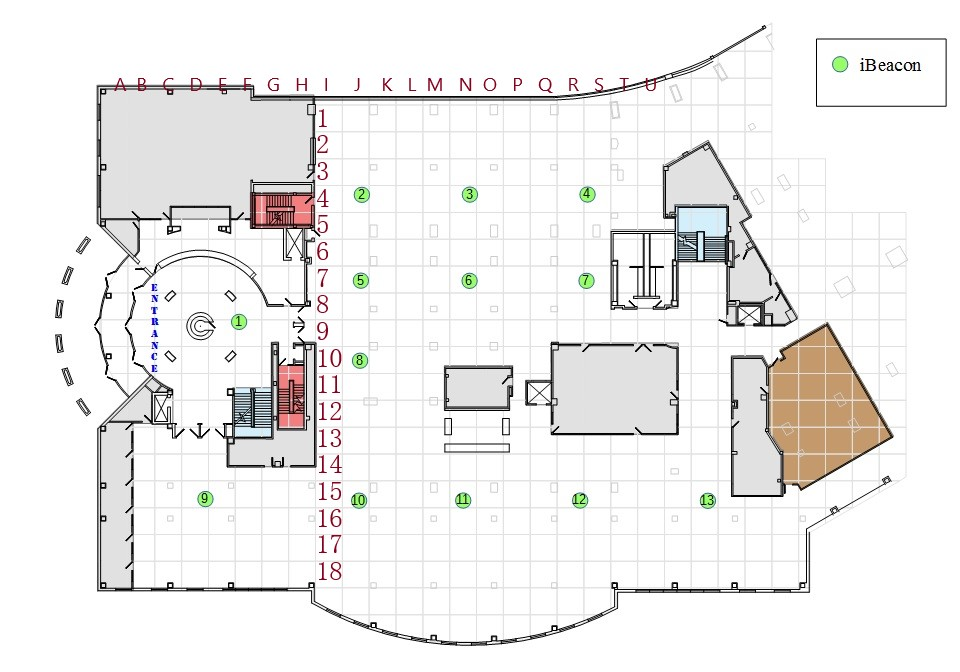

In [3]:
data = pd.read_csv("/content/drive/MyDrive/hallederiz kadirin projeleri/iBeacon_RSSI_Labeled.csv")

In [4]:
data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [5]:
data.tail()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1415,I01,4-19-2016 9:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,I01,4-19-2016 9:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,I01,4-19-2016 9:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,I01,4-19-2016 9:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1419,I01,4-19-2016 9:37:23,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  1420 non-null   object
 1   date      1420 non-null   object
 2   b3001     1420 non-null   int64 
 3   b3002     1420 non-null   int64 
 4   b3003     1420 non-null   int64 
 5   b3004     1420 non-null   int64 
 6   b3005     1420 non-null   int64 
 7   b3006     1420 non-null   int64 
 8   b3007     1420 non-null   int64 
 9   b3008     1420 non-null   int64 
 10  b3009     1420 non-null   int64 
 11  b3010     1420 non-null   int64 
 12  b3011     1420 non-null   int64 
 13  b3012     1420 non-null   int64 
 14  b3013     1420 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 166.5+ KB


In [7]:
# type conversion: object to date
data["date"] = pd.to_datetime(data["date"])

In [8]:
# sorting by date
sorted = data.sort_values(by="date", ascending=True)

In [9]:
sorted.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
1419,I01,2016-04-19 09:37:23,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1418,I01,2016-04-19 09:37:26,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1417,I01,2016-04-19 09:37:36,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1416,I01,2016-04-19 09:37:39,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
1415,I01,2016-04-19 09:37:46,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [10]:
print("unique date: ", data["date"].nunique())
print("sample size: ", len(data))

unique date:  1420
sample size:  1420


There is no duplicated date.

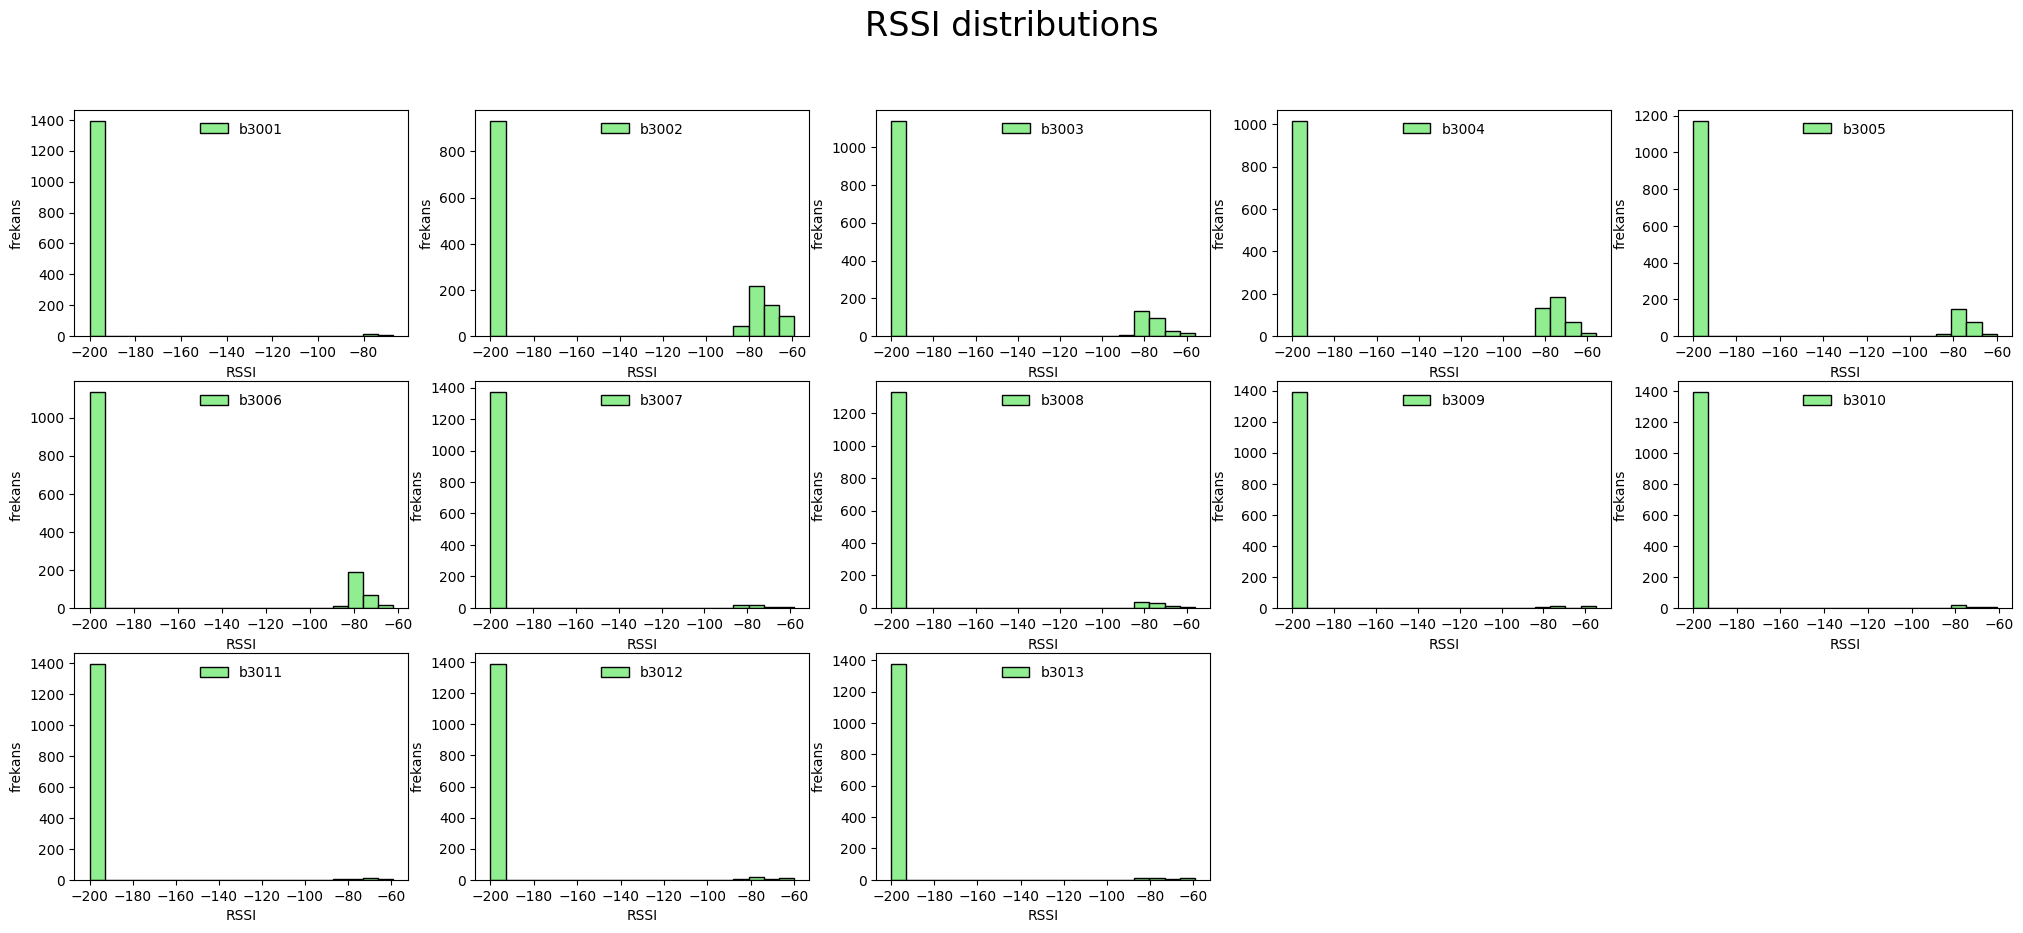

In [11]:
#@title
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 10))
fig.suptitle("RSSI distributions", fontsize=24)

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(3):
    for j in range(5):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data.columns.drop(["location", "date"])):

            ax.hist(data[data.columns.drop(["location", "date"])[counter]], bins=20, color='lightgreen', ec='black', label='{}'.format(data.columns.drop(["location", "date"])[counter]))
            ax.set_xlabel('RSSI')
            ax.set_ylabel('frekans')
            leg = ax.legend(loc='upper center')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [12]:
data["location"].unique()

array(['O02', 'P01', 'P02', 'R01', 'R02', 'S01', 'S02', 'T01', 'U02',
       'U01', 'J03', 'K03', 'L03', 'M03', 'N03', 'O03', 'P03', 'Q03',
       'R03', 'S03', 'T03', 'U03', 'U04', 'T04', 'S04', 'R04', 'Q04',
       'P04', 'O04', 'N04', 'M04', 'L04', 'K04', 'J04', 'I04', 'I05',
       'J05', 'K05', 'L05', 'M05', 'N05', 'O05', 'P05', 'Q05', 'R05',
       'S05', 'T05', 'U05', 'S06', 'R06', 'Q06', 'P06', 'O06', 'N06',
       'M06', 'L06', 'K06', 'J06', 'I06', 'F08', 'J02', 'J07', 'I07',
       'I10', 'J10', 'D15', 'E15', 'G15', 'J15', 'L15', 'R15', 'T15',
       'W15', 'I08', 'I03', 'J08', 'I01', 'I02', 'J01', 'K01', 'K02',
       'L01', 'L02', 'M01', 'M02', 'N01', 'N02', 'O01', 'I09', 'D14',
       'D13', 'K07', 'K08', 'N15', 'P15', 'I15', 'S15', 'U15', 'V15',
       'S07', 'S08', 'L09', 'L08', 'Q02', 'Q01'], dtype=object)

## Splitting Target Features  for Neural Networks

In [13]:
x_coor = []
y_coor = sorted["location"].str[1:].astype("int").values

In original dataset, locations are combination of letters and numbers. Letters are symbolized the x-axis and the numbers the y-axis. I translated the letters to numbers for using them like cartesian coordinates. 

Before, the locations was look like A01, B05, I02 etc. 
I transformed them to like (0, 1), (1, 5), (8, 2) etc. 
So, I treated the problem as a regression problem and tried to solve it from that perspective.

In [14]:
map = dict(enumerate(string.ascii_uppercase))
letters2numbers = {v: k for k, v in map.items()}

In [15]:
for i in sorted["location"].str[0].values:

    table = i.maketrans(letters2numbers)
    x_coor.append(ord(i.translate(table)))

In [54]:
sorted["x_coor"] = x_coor
sorted["y_coor"] = y_coor

In [17]:
df = sorted.drop(["location", "date"], axis=1)

In [18]:
y = df.iloc[:, -2:]

In [19]:
X = df.drop(["x_coor", "y_coor"], axis=1)

In [55]:
sorted[["location", "x_coor", "y_coor"]].head()

,location,x_coor,y_coor
1419,I01,8,1
1418,I01,8,1
1417,I01,8,1
1416,I01,8,1
1415,I01,8,1


# Scaling data

In [20]:
scaler_y = MinMaxScaler()
scaled_y = scaler_y.fit_transform(y)

scaler_X = MinMaxScaler()
scaled_X = scaler_X.fit_transform(X)

# Splitting Train, Test and Validation Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size = 0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, shuffle=False)

In [22]:
print("Train Shape:", X_train.shape)
print("Validation Shape:", X_val.shape)
print("Test Shape:", X_test.shape)

Train Shape: (1086, 13)
Validation Shape: (121, 13)
Test Shape: (213, 13)


# Training/Calling RNN Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 13, 64)            4224      
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 13, 64)            8256      
                                                                 
 dropout_1 (Dropout)         (None, 13, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 13, 32)            3104      
                                                                 
 dropout_2 (Dropout)         (None, 13, 32)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2

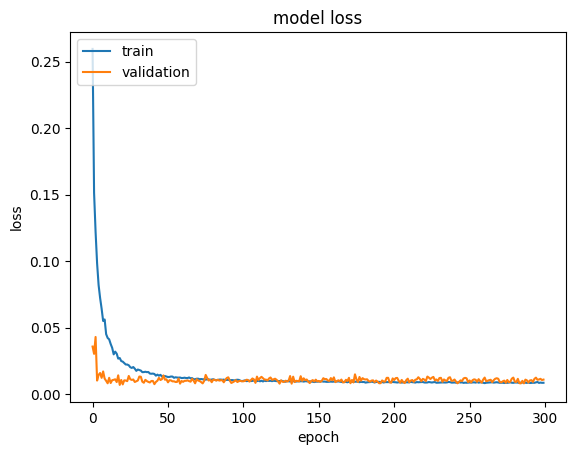

136.53632593154907 seconds


In [23]:
check = True
model_name = "rnn_model_final_v3"

if check:

    start = time.time()
    model_rnn = rnn(X_train, y_train, X_val, y_val)
    end = time.time()
    print(end - start, "seconds")
    model_rnn.save(model_name + ".h5")

else:
    model = load_model(model_name + ".h5")

## Prediction

In [24]:
pred_rnn_train = model_rnn.predict(X_train)
pred_rnn_val = model_rnn.predict(X_val)
pred_rnn_test = model_rnn.predict(X_test)

7/7 [==============================] - 0s 4ms/step


## Performance Metrics

In [32]:
performanceMeasures(y_train, pred_rnn_train, "Train")
performanceMeasures(y_test, pred_rnn_test, "Test")
performanceMeasures(y_val, pred_rnn_val, "Validation")


Train
Pearson's Correlation Coefficient:  0.9466975934763282
R-squared:  0.8961957588017789
RMSE:  0.10400807568180302
MAE:  0.13192015767097864
Horizontal MAPE:  2.6645059224367587
Vertical MAPE:  1534.5083783133164

Test
Pearson's Correlation Coefficient:  0.9448510298180031
R-squared:  0.8905007161043661
RMSE:  0.10693001211026272
MAE:  0.13617331506193595
Horizontal MAPE:  0.13087884472787972
Vertical MAPE:  1913.3434631323355

Validation
Pearson's Correlation Coefficient:  0.9148840300016114
R-squared:  0.6578892871771933
RMSE:  0.137123300692035
MAE:  0.17977182962773988
Horizontal MAPE:  0.13630854059898453
Vertical MAPE:  0.3306526999828244


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Training/Calling LSTM Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 64)            16896     
                                                                 
 dropout_4 (Dropout)         (None, 13, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 13, 64)            33024     
                                                                 
 dropout_5 (Dropout)         (None, 13, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 13, 32)            12416     
                                                                 
 dropout_6 (Dropout)         (None, 13, 32)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)               

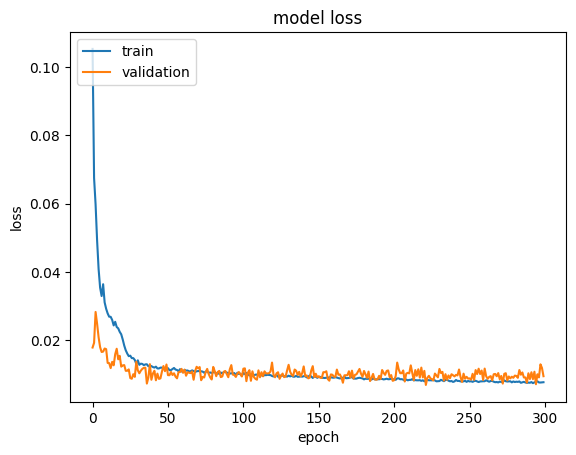

283.9975266456604 seconds


In [33]:
check = True
model_name = "lstm_model_final_v2"

if check:
    start = time.time()
    model_lstm = lstm(X_train, y_train, X_val, y_val)
    model_lstm.save(model_name + ".h5")
    end = time.time()
    print(end - start, "seconds")

else:

    model_lstm = load_model(model_name + ".h5")

## Prediction

In [34]:
pred_lstm_train = model_lstm.predict(X_train)
pred_lstm_val = model_lstm.predict(X_val)
pred_lstm_test = model_lstm.predict(X_test)

7/7 [==============================] - 0s 8ms/step


## Performance Measures

In [35]:
performanceMeasures(y_train, pred_lstm_train, "Train")
performanceMeasures(y_test, pred_lstm_test, "Test")
performanceMeasures(y_val, pred_lstm_val, "Validation")


Train
Pearson's Correlation Coefficient:  0.9514846712500639
R-squared:  0.9046110417381878
RMSE:  0.09724100262230953
MAE:  0.12204526088079858
Horizontal MAPE:  17.012852036302707
Vertical MAPE:  1409.878771433256

Test
Pearson's Correlation Coefficient:  0.9482705610500359
R-squared:  0.8891296215367741
RMSE:  0.10781237095897707
MAE:  0.1350674192859725
Horizontal MAPE:  0.13196726705345124
Vertical MAPE:  1755.106224204313

Validation
Pearson's Correlation Coefficient:  0.9272070539195377
R-squared:  0.7054853160465935
RMSE:  0.12235378851747586
MAE:  0.1606888980467843
Horizontal MAPE:  0.11712687835655948
Vertical MAPE:  0.3022895277901129


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Training/Calling GRU Model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 64)            12672     
                                                                 
 dropout_8 (Dropout)         (None, 13, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 13, 64)            24768     
                                                                 
 dropout_9 (Dropout)         (None, 13, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 13, 32)            9312      
                                                                 
 dropout_10 (Dropout)        (None, 13, 32)            0         
                                                                 
 gru_3 (GRU)                 (None, 32)               

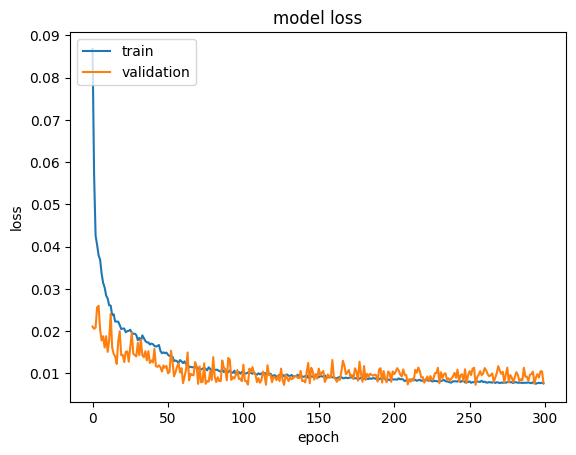

351.95501947402954 seconds


In [36]:
check = True
model_name = "gru_model_final_v2"
if check:
    start = time.time()
    model_gru = gru(X_train, y_train, X_val, y_val)
    model_gru.save(model_name + ".h5")
    end = time.time()
    print(end - start, "seconds")

else:

    model = load_model(model_name + ".h5")

## Prediction

In [37]:
pred_gru_train = model_gru.predict(X_train)
pred_gru_test = model_gru.predict(X_test)
pred_gru_val = model_gru.predict(X_val)

4/4 [==============================] - 0s 7ms/step


## Performance Measures

In [38]:
performanceMeasures(y_train, pred_gru_train, "Train")
performanceMeasures(y_test, pred_gru_test, "Test")
performanceMeasures(y_val, pred_gru_val, "Validation")


Train
Pearson's Correlation Coefficient:  0.9505269065063509
R-squared:  0.9032441410310887
RMSE:  0.09879186741524804
MAE:  0.12491470932948957
Horizontal MAPE:  74.57171699460805
Vertical MAPE:  1577.8228574632897

Test
Pearson's Correlation Coefficient:  0.9421190260805562
R-squared:  0.8784653347422708
RMSE:  0.11158125254679883
MAE:  0.13937309110087634
Horizontal MAPE:  0.13418689818803597
Vertical MAPE:  2004.8545343200783

Validation
Pearson's Correlation Coefficient:  0.9251293535945292
R-squared:  0.7586187631332371
RMSE:  0.10935874627690248
MAE:  0.14268786667340402
Horizontal MAPE:  0.11638495512877352
Vertical MAPE:  0.2466656373428904


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Comparison Models

## Prediction with all data

In [39]:
pred_lstm = model_lstm.predict(scaled_X)
pred_rnn = model_rnn.predict(scaled_X)
pred_gru = model_gru.predict(scaled_X)

45/45 [==============================] - 0s 7ms/step


## Inverse Scaling

In [40]:
inverse_scaled_pred_lstm = scaler_y.inverse_transform(pred_lstm)
inverse_scaled_pred_rnn = scaler_y.inverse_transform(pred_rnn)
inverse_scaled_pred_gru = scaler_y.inverse_transform(pred_gru)

## Visualization

Random selection of three points

In [68]:
sample_list = random.choices(range(len(data)), k=3)

In [ ]:
pred_x_lstm = [i[0] for i in inverse_scaled_pred_lstm[sample_list]]
pred_x_rnn = [i[0] for i in inverse_scaled_pred_rnn[sample_list]]
pred_x_gru = [i[0] for i in inverse_scaled_pred_gru[sample_list]]
x = sorted["x_coor"].iloc[sample_list].values

In [ ]:
pred_y_lstm = [i[1] for i in inverse_scaled_pred_lstm[sample_list]]
pred_y_rnn = [i[1] for i in inverse_scaled_pred_rnn[sample_list]]
pred_y_gru = [i[1] for i in inverse_scaled_pred_gru[sample_list]]
y = sorted["y_coor"].iloc[sample_list].values

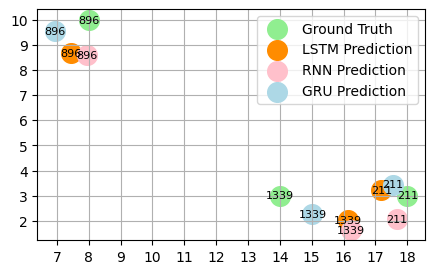

In [69]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.grid()
plt.xticks(range(26))
plt.yticks(range(18))
ax.scatter(x, y, color="lightgreen", label="Ground Truth", s=200)
ax.scatter(pred_x_lstm, pred_y_lstm, color="darkorange", label="LSTM Prediction", s=200)
ax.scatter(pred_x_rnn, pred_y_rnn, color="pink", label="RNN Prediction", s=200)
ax.scatter(pred_x_gru, pred_y_gru, color="lightblue", label="GRU Prediction", s=200)
ax.legend()

for i, txt in enumerate(sample_list):
    ax.annotate(txt, (x[i], y[i]), fontsize=8, ha="center", va="center")
    ax.annotate(txt, (pred_x_lstm[i], pred_y_lstm[i]), fontsize=8, ha="center", va="center")
    ax.annotate(txt, (pred_x_rnn[i], pred_y_rnn[i]), fontsize=8, ha="center", va="center")
    ax.annotate(txt, (pred_x_gru[i], pred_y_gru[i]), fontsize=8, ha="center", va="center")

plt.show()